# Subject 1 - Baseline
preprocessing and save to clean data file


In [2]:
import mne
import matplotlib.pyplot as plt 
import numpy as np
import antropy  


# Pre-processing: Subject 1, session 0 (Baseline)

In [3]:
raw = mne.io.read_raw_eeglab('../data_raw/ds006437/sub-001/ses-0/eeg/sub-001_ses-0_task-baseline0_eeg.set', preload=True)


Reading c:\Users\User\Documents\eeg-hypnosis-complexity\notebooks\..\data_raw\ds006437\sub-001\ses-0\eeg\sub-001_ses-0_task-baseline0_eeg.fdt
Reading 0 ... 77964  =      0.000 ...   304.547 secs...


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


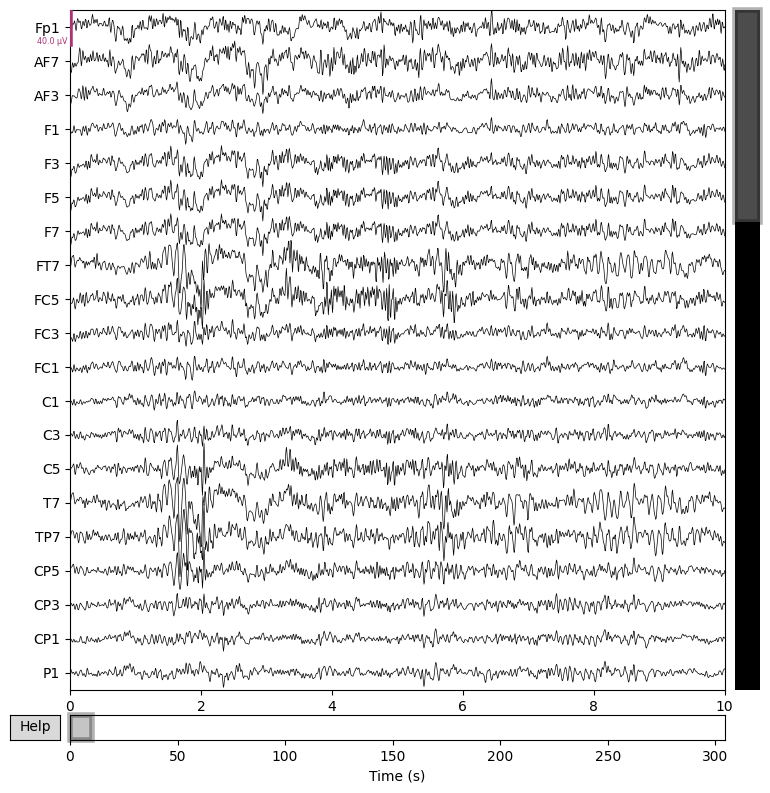

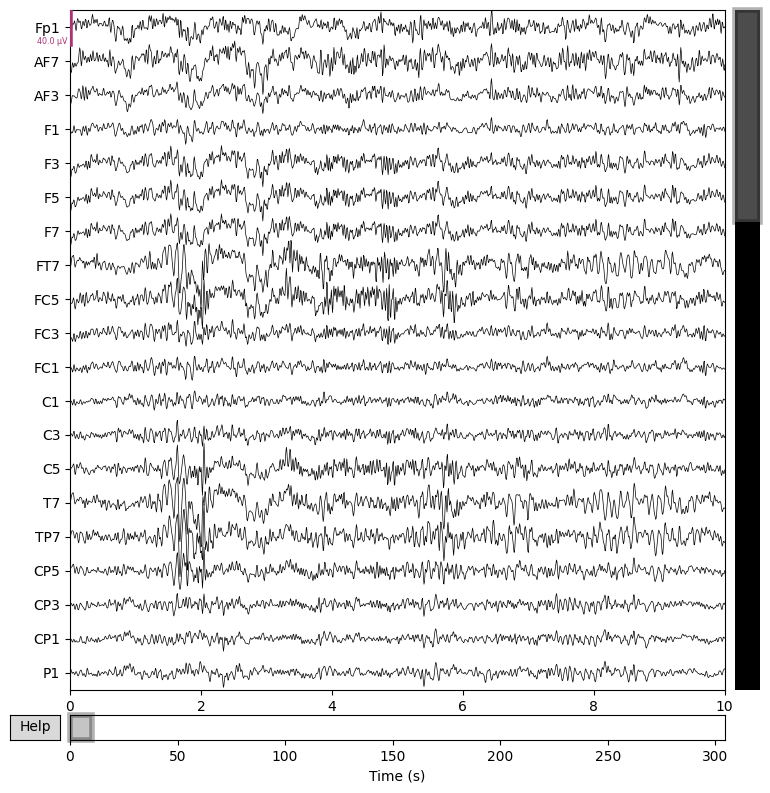

In [10]:
montage = mne.channels.make_standard_montage('standard_1020')
#set the montage to standard 10-20 system
raw.set_montage(montage)

# filter the data to remove slow drifts and high frequency noise
raw.filter(1.0, 30.0, fir_design='firwin')

# find bad channels
raw.plot(block=True)



In [17]:
print(raw.info['ch_names'])

raw.info['bads'] = ['FT7', 'T7', 'TP7']
raw.interpolate_bads(reset_bads=True)


['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 96.2 mm
Computing interpolation matrix from 61 sensor positions
Interpolating 3 sensors


<RawEEGLAB | sub-001_ses-0_task-baseline0_eeg.fdt, 64 x 77965 (304.6 s), ~38.1 MiB, data loaded>

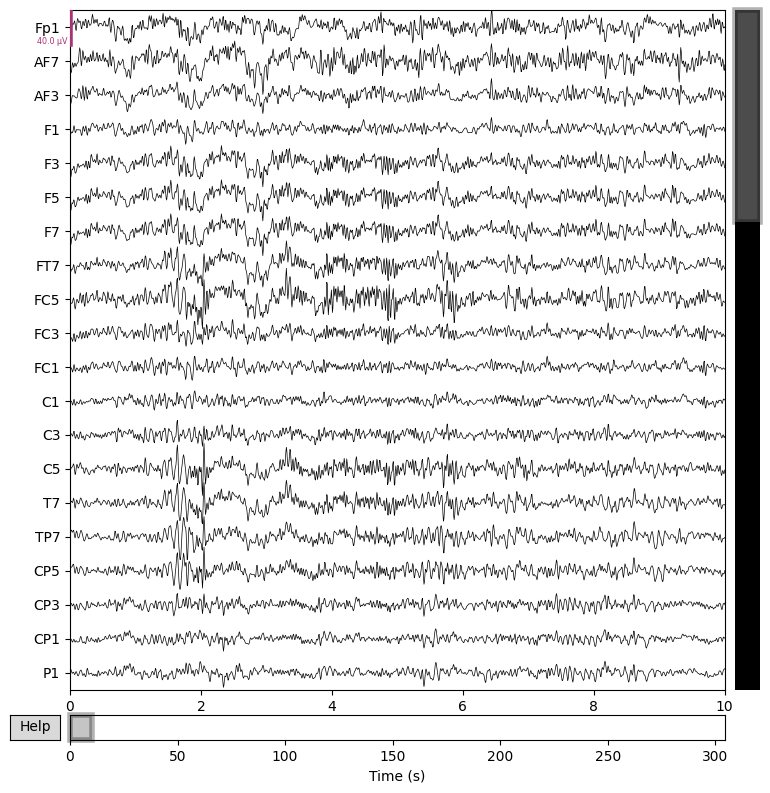

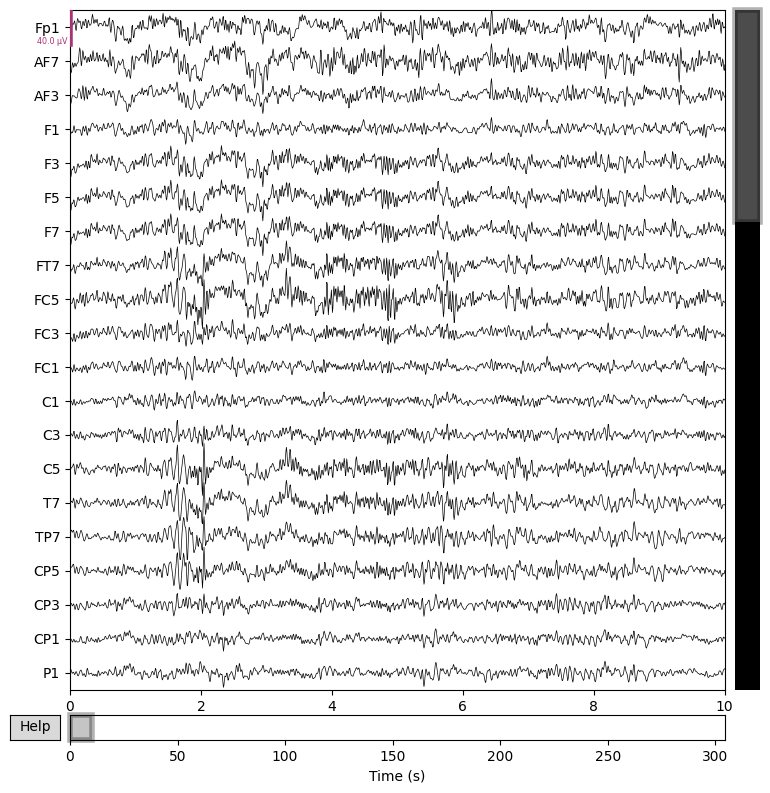

In [16]:
raw.plot(block=True)

In [20]:
raw.save('../data_clean/sub-001/ses-0/eeg/sub-001_ses-0_raw.fif', overwrite=True)

Writing c:\Users\User\Documents\eeg-hypnosis-complexity\notebooks\..\data_clean\sub-001\ses-0\eeg\sub-001_ses-0_raw.fif
Closing c:\Users\User\Documents\eeg-hypnosis-complexity\notebooks\..\data_clean\sub-001\ses-0\eeg\sub-001_ses-0_raw.fif
[done]


[WindowsPath('c:/Users/User/Documents/eeg-hypnosis-complexity/notebooks/../data_clean/sub-001/ses-0/eeg/sub-001_ses-0_raw.fif')]